# Situação Socioeconômica do Brasil (2010's)

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

%matplotlib inline

In [18]:
poverty = pd.read_excel('poverty.xls', usecols=[1,2])
poverty.columns = ['State','State Poverty Rate']
poverty.head()

,State,State Poverty Rate
0,Santa Catarina,0.017
1,Distrito Federal,0.019
2,São Paulo,0.027
3,Rio Grande do Sul,0.029
4,Paraná,0.030


In [19]:
pop = pd.read_excel('pop.xls', usecols=[1,13], skiprows=7, names=['State','Population'])
pop.head()

,State,Population
0,Rondônia,1562409
1,Acre,733559
2,Amazonas,3483985
3,Roraima,450479
4,Pará,7581051


In [20]:
poverty = pd.merge(poverty, pop, how='inner', on='State')
poverty['Population in Poverty'] = poverty['State Poverty Rate']*poverty['Population']
poverty.head()

,State,State Poverty Rate,Population,Population in Poverty
0,Santa Catarina,0.017,6248436,106223.412
1,Distrito Federal,0.019,2570160,48833.040
2,São Paulo,0.027,41262199,1114079.373
3,Rio Grande do Sul,0.029,10693929,310123.941
4,Paraná,0.030,10444526,313335.780


In [21]:
stateRegion = {'Acre':'N',
              'Alagoas':'NE',
              'Amapá':'N',
              'Amazonas':'N',
              'Bahia':'NE',
              'Ceará':'NE',
              'Distrito Federal':'MW',
              'Espírito Santo':'SE',
              'Goiás':'MW',
              'Maranhão':'NE',
              'Mato Grosso':'MW',
              'Mato Grosso do Sul':'MW',
              'Minas Gerais':'SE',
              'Pará':'N',
              'Paraíba':'NE',
              'Paraná':'S',
              'Pernambuco':'NE',
              'Piauí':'NE',
              'Rio de Janeiro':'SE',
              'Rio Grande do Norte':'NE',
              'Rio Grande do Sul':'S',
              'Rondônia':'N',
              'Roraima':'N',
              'Santa Catarina':'S',
              'São Paulo':'SE',
              'Sergipe':'NE',
              'Tocantins':'N'}

In [22]:
poverty['Region Code'] = [stateRegion[x] for x in poverty['State']]
poverty.head()

,State,State Poverty Rate,Population,Population in Poverty,Region Code
0,Santa Catarina,0.017,6248436,106223.412,S
1,Distrito Federal,0.019,2570160,48833.040,MW
2,São Paulo,0.027,41262199,1114079.373,SE
3,Rio Grande do Sul,0.029,10693929,310123.941,S
4,Paraná,0.030,10444526,313335.780,S


In [23]:
poverty = pd.DataFrame(poverty.groupby('Region Code')[['Population in Poverty','Population']].agg(sum))
poverty['Region Poverty Rate'] = poverty['Population in Poverty']/poverty['Population']
poverty.head()

,Population in Poverty,Population,Region Poverty Rate
Region Code,,,
MW,572496.594,14058094,0.040724
N,2721008.883,15864454,0.171516
NE,9837089.306,53081950,0.185319
S,729683.133,27386891,0.026644
SE,2809904.050,80364410,0.034965


In [24]:
gdp = pd.read_excel('gdppercapitaMilReais.xls')
gdp = gdp.drop('Codigo', axis=1)
gdp.columns = ['Code','Region Name'] + gdp.columns.tolist()[2:]
gdp['Region Name'] = ['Midwest','North','Northeast','South','Southeast']
gdp['Code'] = ['MW','N','NE','S','SE']
gdp = gdp[['Code','Region Name']+[str(x) for x in range(2001,2011)]]

gdp.head()

,Code,Region Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,MW,Midwest,19.042301,19.610360,19.885097,20.666597,21.218132,21.445777,22.983031,23.533112,23.763360,24.952881
1,N,North,9.393554,9.634578,9.974193,10.571919,11.011367,11.300211,12.038481,12.180622,11.949657,12.701049
2,NE,Northeast,7.125713,7.246084,7.293216,7.673036,7.928791,8.212872,8.621544,8.835071,8.836159,9.561405
3,S,South,18.422385,18.527291,18.737529,19.411228,19.016156,19.388612,21.087006,21.181665,20.882338,22.722614
4,SE,Southeast,20.311398,20.490091,20.165193,20.959660,21.393749,21.963474,23.862518,24.447716,23.979356,25.987863


In [25]:
df = pd.merge(gdp, poverty, how='inner', left_on='Code', right_index=True)
df = df.set_index('Code')
df

,Region Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Population in Poverty,Population,Region Poverty Rate
Code,,,,,,,,,,,,,,
MW,Midwest,19.042301,19.610360,19.885097,20.666597,21.218132,21.445777,22.983031,23.533112,23.763360,24.952881,572496.594,14058094,0.040724
N,North,9.393554,9.634578,9.974193,10.571919,11.011367,11.300211,12.038481,12.180622,11.949657,12.701049,2721008.883,15864454,0.171516
NE,Northeast,7.125713,7.246084,7.293216,7.673036,7.928791,8.212872,8.621544,8.835071,8.836159,9.561405,9837089.306,53081950,0.185319
S,South,18.422385,18.527291,18.737529,19.411228,19.016156,19.388612,21.087006,21.181665,20.882338,22.722614,729683.133,27386891,0.026644
SE,Southeast,20.311398,20.490091,20.165193,20.959660,21.393749,21.963474,23.862518,24.447716,23.979356,25.987863,2809904.050,80364410,0.034965


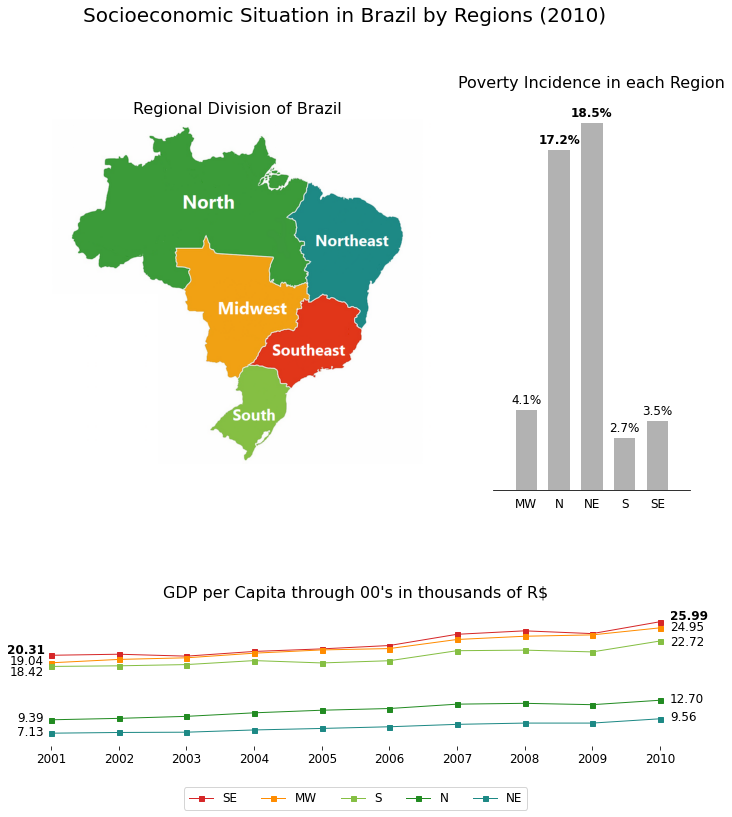

In [45]:
fig = plt.figure(figsize=(12,12))
gspec = gridspec.GridSpec(3, 3, hspace=0.8)

maps = plt.subplot(gspec[0:2,0:2])
bchart = plt.subplot(gspec[0:2,2])
lchart = plt.subplot(gspec[2,:])

fig.suptitle('Socioeconomic Situation in Brazil by Regions (2010)', fontsize=20)

maps.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
maps.set_title('Regional Division of Brazil', fontsize=16)
maps.spines['top'].set_visible(False)
maps.spines['right'].set_visible(False)
maps.spines['left'].set_visible(False)
maps.spines['bottom'].set_visible(False)
img = mpimg.imread('brazil.png')
maps.imshow(img)


bars = bchart.bar([0,2,4,6,8], df['Region Poverty Rate'], width=1.3, alpha=0.6, color='gray')
bchart.set_xlim([-2,10])
bchart.set_ylim([0,0.2])
bchart.set_xticks([0,2,4,6,8])
bchart.set_xticklabels(df.index)
bchart.tick_params(bottom=False, left=False, labelleft=False, labelsize=12)
bchart.set_title('Poverty Incidence in each Region',fontsize=16)
bchart.spines['top'].set_visible(False)
bchart.spines['right'].set_visible(False)
bchart.spines['left'].set_visible(False)

for num, bar in enumerate(bars):
    height = bar.get_height()
    if(num == 1 or num == 2):
        bchart.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.003, (lambda x:"{:.1%}".format(x))(height), ha='center', fontsize=12,  weight='bold')
    else:
        bchart.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.003, (lambda x:"{:.1%}".format(x))(height), ha='center', fontsize=12)

        
lchart.plot(range(2001,2011), df.iloc[4,1:-3], marker ='s', ls='-', lw=1, markersize=5, color='tab:red', label='SE')
lchart.plot(range(2001,2011), df.iloc[0,1:-3], marker ='s', ls='-', lw=1, markersize=5, color='darkorange', label='MW')
lchart.plot(range(2001,2011), df.iloc[3,1:-3], marker ='s', ls='-', lw=1, markersize=5, color='#85bf43', label='S')
lchart.plot(range(2001,2011), df.iloc[1,1:-3], marker ='s', ls='-', lw=1, markersize=5, color='forestgreen', label='N')
lchart.plot(range(2001,2011), df.iloc[2,1:-3], marker ='s', ls='-', lw=1, markersize=5, color='#1d8985', label='NE')
lchart.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fontsize=12, ncol=5)
lchart.set_title('GDP per Capita through 00\'s in thousands of R$', fontsize=16)

lchart.annotate('{:.2f}'.format(df.loc['SE','2001']), xy=(2001,df.loc['SE','2001']), xytext=(-44,1), textcoords='offset points', fontsize=12, weight='bold')
lchart.annotate('{:.2f}'.format(df.loc['MW','2001']), xy=(2001,df.loc['MW','2001']), xytext=(-42,-2.5), textcoords='offset points', fontsize=12)
lchart.annotate('{:.2f}'.format(df.loc['S','2001']), xy=(2001,df.loc['S','2001']), xytext=(-42,-9), textcoords='offset points', fontsize=12)
lchart.annotate('{:.2f}'.format(df.loc['N','2001']), xy=(2001,df.loc['N','2001']), xytext=(-34,-2.5), textcoords='offset points', fontsize=12)
lchart.annotate('{:.2f}'.format(df.loc['NE','2001']), xy=(2001,df.loc['NE','2001']), xytext=(-34,-2.5), textcoords='offset points', fontsize=12)

lchart.annotate('{:.2f}'.format(df.loc['SE','2010']), xy=(2010,df.loc['SE','2010']), xytext=(10,2), textcoords='offset points', fontsize=12, weight='bold')
lchart.annotate('{:.2f}'.format(df.loc['MW','2010']), xy=(2010,df.loc['MW','2010']), xytext=(10,-3), textcoords='offset points', fontsize=12)
lchart.annotate('{:.2f}'.format(df.loc['S','2010']), xy=(2010,df.loc['S','2010']), xytext=(10,-5), textcoords='offset points', fontsize=12)
lchart.annotate('{:.2f}'.format(df.loc['N','2010']), xy=(2010,df.loc['N','2010']), xytext=(10,-2.5), textcoords='offset points', fontsize=12)
lchart.annotate('{:.2f}'.format(df.loc['NE','2010']), xy=(2010,df.loc['NE','2010']), xytext=(10,-2.5), textcoords='offset points', fontsize=12)

lchart.tick_params(labelleft=False, left=False, labelsize=12)
lchart.set_xticks(range(2001,2011))
lchart.set_xticklabels(range(2001,2011))
lchart.set_ylim([5,29])
lchart.spines['top'].set_visible(False)
lchart.spines['right'].set_visible(False)
lchart.spines['left'].set_visible(False)
lchart.spines['bottom'].set_visible(False)

plt.savefig('brazilbyregions.jpg', bbox_inches='tight', dpi=100)